In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

#preview head and tail
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#drop all rows with missing values
data.dropna(axis=0, inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [8]:
data = data.drop(['id'], axis=1)

In [9]:
numerical_columns= data.select_dtypes(['int','float'])
numerical_columns

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


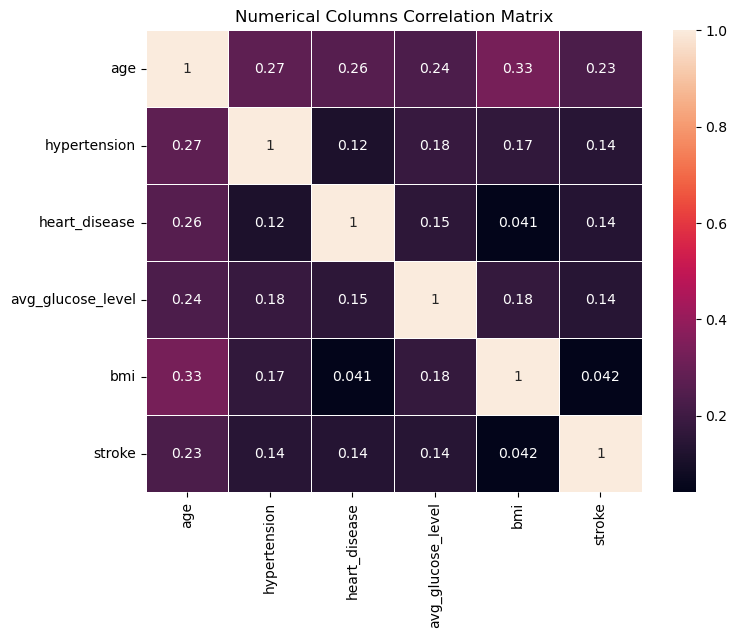

In [10]:
corr_matrix = numerical_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Numerical Columns Correlation Matrix')
plt.show()

In [11]:
X = data.drop(columns=['stroke'])
y = data['stroke']

In [12]:
scaler=StandardScaler()

X_train_numerical_scaled=scaler.fit_transform(numerical_columns.values.reshape(-1,1))

In [13]:
X_train_numerical_scaled.shape

(29454, 1)

In [14]:
new_data = data.drop(columns=numerical_columns.columns, axis=1)
new_data.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [26]:
#combined the scaled dataset with the encoded dataset
X_scaled=numerical_columns

In [28]:
X_scaled.shape

(4909, 6)

In [30]:
y.shape

(4909,)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, shuffle=True, random_state=12)

In [34]:
print(X_train.dtypes)

age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object


In [36]:
print(y_train.dtypes)

int64


In [38]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(30, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

print (model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           1,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,146 (16.20 KB)

 Trainable params: 4,146 (16.20 KB)

 Non-trainable params: 0 (0.00 B)

None


In [40]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.3, verbose=1)

Epoch 1/50
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8727 - loss: 0.7408 - val_accuracy: 0.9545 - val_loss: 0.2075
Epoch 2/50
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9524 - loss: 0.2141 - val_accuracy: 0.9545 - val_loss: 0.1728
Epoch 3/50
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9569 - loss: 0.1978 - val_accuracy: 0.9545 - val_loss: 0.1832
Epoch 4/50
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1834 - val_accuracy: 0.9545 - val_loss: 0.1749
Epoch 5/50
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9544 - loss: 0.2146 - val_accuracy: 0.9545 - val_loss: 0.1701
Epoch 6/50
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - loss: 0.1870 - val_accuracy: 0.9545 - val_loss: 0.2459
Epoch 7/50
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9535 - loss: 0.1958 - val_accuracy: 0.9545 - val_loss: 0.1751
Epoch 8/50
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9527 - loss: 0.1821 - val_accuracy: 0.

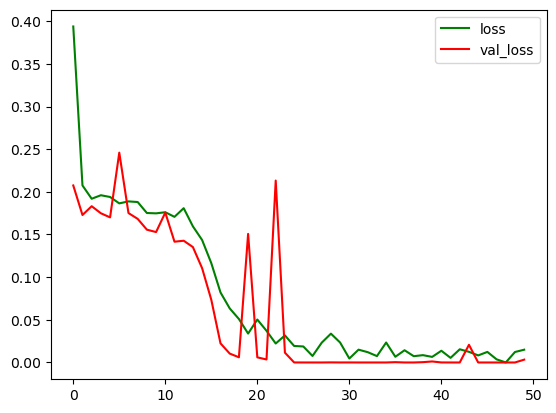

In [44]:
plt.plot(history.history['loss'], color='g')
plt.plot(history.history['val_loss'], color='r')
plt.legend(['loss','val_loss'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

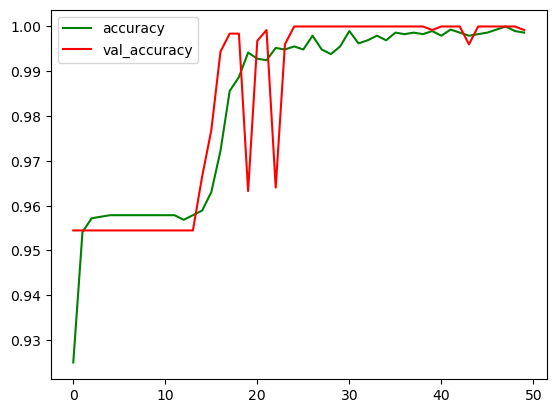

In [46]:
plt.plot(history.history['accuracy'], color='g')
plt.plot(history.history['val_accuracy'], color='r')
plt.legend(['accuracy','val_accuracy'])
plt.show

In [48]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Model accuracy: %.2f"% (accuracy * 100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0023     
Model accuracy: 99.73


In [52]:
y_prediction = model.predict(X_test)
print(classification_report(y_test, np.round(abs(y_prediction))))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       708
           1       0.94      1.00      0.97        29

    accuracy                           1.00       737
   macro avg       0.97      1.00      0.98       737
weighted avg       1.00      1.00      1.00       737



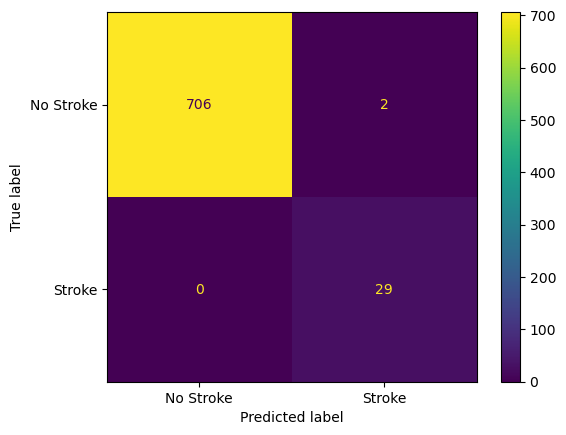

In [56]:
#Confusion matrix heatmap
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, np.round(abs(y_prediction))), display_labels=["No Stroke","Stroke"])
#disp = ConfusionMatrixDisplay(confusion_matrix=_matrix, display_labels=[0,1])
disp.plot()
plt.show()